In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV




In [14]:
class DataSourcing:
  def __init__(self):
    pass
  
  def open_csv(self, path):
    df = pd.read_csv(path)
    return df
  
  def give_info(self, df):
    message =  f"""
    <------------------------------------------------------------------------DESCRIPTION OF THE DATAFRAME IN QUESTION!!!----------------------------------------------------------------------->
    There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe.
    There are {len(df.columns)} columns, namely: {df.columns}.  
    ------------------------------------------------------------------------------------------------------------------------->
    
    
    The first 5 records in the df are seen here:
    ------------------------------------------------------------------------------------------------------------------------->
    {df.head()}
    ------------------------------------------------------------------------------------------------------------------------->
    
    
    The last 5 records in the df are as follows: 
    ------------------------------------------------------------------------------------------------------------------------->
    {df.tail()}
    ------------------------------------------------------------------------------------------------------------------------->
    
    
    The descriptive statistics of the df (mean,median, max, min, std) are as follows:
    ------------------------------------------------------------------------------------------------------------------------->
    {df.describe()}
    ------------------------------------------------------------------------------------------------------------------------->
    """
    print (message)

In [15]:
class DataPreProcessing(DataSourcing):
  
  def dropColumns(self, df, columns):
    df = df.drop(columns, axis=1)
    return df

  def dropRows(self, df, rows):
    df = df.drop(rows, axis=0)
    return df
  
  def preprocess_data(self, df):
    if df is not None:
      data_copy = df.copy()
    # Calculate total calls
      data_copy["total_calls"] = data_copy["total day calls"] + data_copy["total night calls"] + data_copy["total eve calls"] + data_copy["total intl calls"]
    
    # Calculate total minutes
      data_copy["total_minutes"] = data_copy["total day minutes"] + data_copy["total night minutes"] + data_copy["total eve minutes"] + data_copy["total intl minutes"]
    
    # Calculate total charges
      data_copy["total_charges"] = data_copy["total day charge"] + data_copy["total night charge"] + data_copy["total eve charge"] + data_copy["total intl charge"]
    
    # Drop unnecessary columns
      data_copy.drop(columns=["total day calls", "total night calls", "total eve calls", "total intl calls",
                     "total day minutes", "total night minutes", "total eve minutes", "total intl minutes",
                     "total day charge", "total night charge", "total eve charge", "total intl charge"],
            inplace=True)
      return data_copy

In [16]:
data_inst = DataPreProcessing()
data = DataSourcing()
df = data.open_csv("./bigml_59c28831336c6604c800002a.csv")
data.give_info(df)


    <------------------------------------------------------------------------DESCRIPTION OF THE DATAFRAME IN QUESTION!!!----------------------------------------------------------------------->
    There are 3333 rows and 21 columns in the dataframe.
    There are 21 columns, namely: Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object').  
    ------------------------------------------------------------------------------------------------------------------------->
    
    
    The first 5 records in the df are seen here:
    --------------------------------------------

In [17]:
data_copy = data_inst.preprocess_data(df)
data_copy


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,customer service calls,churn,total_calls,total_minutes,total_charges
0,KS,128,415,382-4657,no,yes,25,1,False,303,717.2,75.56
1,OH,107,415,371-7191,no,yes,26,1,False,332,625.2,59.24
2,NJ,137,415,358-1921,no,no,0,0,False,333,539.4,62.29
3,OH,84,408,375-9999,yes,no,0,2,False,255,564.8,66.80
4,OK,75,415,330-6626,yes,no,0,3,False,359,512.0,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,2,False,292,660.7,60.10
3329,WV,68,415,370-3271,no,no,0,3,False,239,585.4,63.53
3330,RI,28,510,328-8230,no,no,0,2,False,264,675.6,67.74
3331,CT,184,510,364-6381,yes,no,0,2,False,336,517.6,57.53


In [18]:
class DataAnalysis(DataPreProcessing, DataSourcing):
    def __init__(self):
        pass
    def univariate_analysis(self, data_copy):
        
        numeric_columns = data_copy.select_dtypes(include=['number']).columns
        categorical_columns = data_copy.drop(columns = ['phone number']).select_dtypes(exclude=['number']).columns       
        # Plot histograms and box plots for numeric columns
        for column in numeric_columns:

            plt.figure(figsize=(12, 6))

            # Plot histogram
            plt.subplot(1, 2, 1)
            sns.histplot(data_copy[column], bins=30, kde=True)
            plt.title(f'Histogram for {column}')

            # Plot box plot
            plt.subplot(1, 2, 2)
            sns.boxplot(x=data_copy[column])
            plt.title(f'Box Plot for {column}')

            plt.show()

        # Plot count plots for categorical columns
        for column in categorical_columns:
            plt.figure(figsize=(12, 6))

            # Plot count plot
            sns.countplot(x=data_copy[column])
            plt.title(f'Count Plot for {column}')

            plt.show()
            
    def bivariate_analysis(self,data_copy, column_of_interest):

        numeric_columns = data_copy.select_dtypes(include=['number']).columns
        categorical_columns = data_copy.drop(columns = ['phone number']).select_dtypes(exclude=['number']).columns       

        numeric_columns = data_copy.select_dtypes(include='number').columns

        for column in numeric_columns:
        # Plot histplot
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            sns.histplot(x=data_copy[column], hue=data_copy[column_of_interest], bins=30, kde=True)
            plt.title(f'Histplot for {column} by {column_of_interest}')

        # Plot box plot
            plt.subplot(1, 2, 2)
            sns.boxplot(x=data_copy[column_of_interest], y=data_copy[column])
            plt.title(f'Box Plot for {column_of_interest} by {column}')

            plt.show()
        
        # # Plot count plots for categorical columns
        # for outer in categorical_columns:
            
                    
        #         plt.figure(figsize=(12, 6))

        #         # Plot count plot
        #         sns.scatterplot(x=data_copy[outer], y=data_copy["churn"])
        #         plt.title(f'Count Plot for churn vs.{outer}')
                

                # plt.show()
    def churn_by_state(self, data_copy):
        df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 
                
    def churn_by_area_code(self, data_copy):
        df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
                
    def churn_by_int_plan(self, data_copy):
        df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
    def churn_by_vm_plan(self, data_copy):
        df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))       


In [19]:
data_analysis = DataAnalysis()

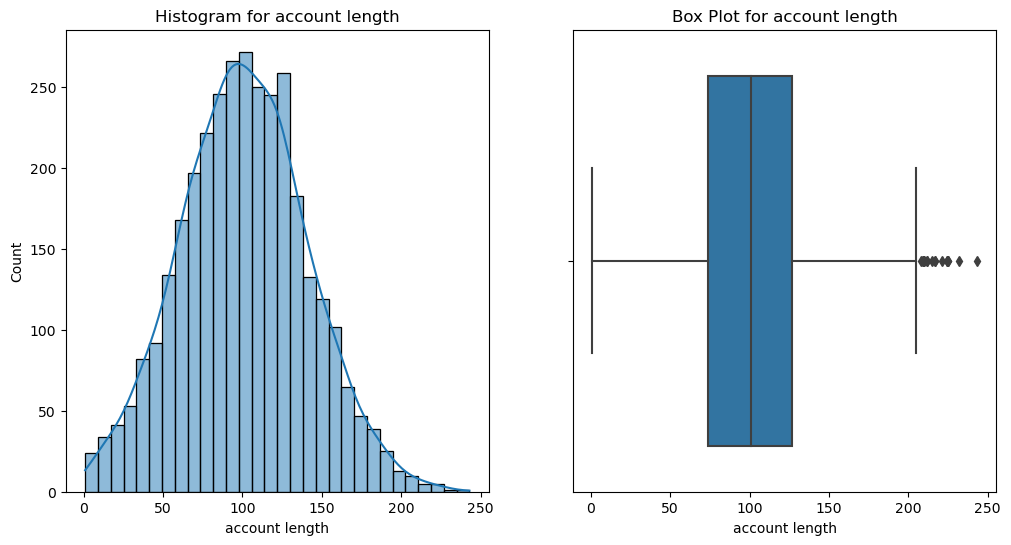

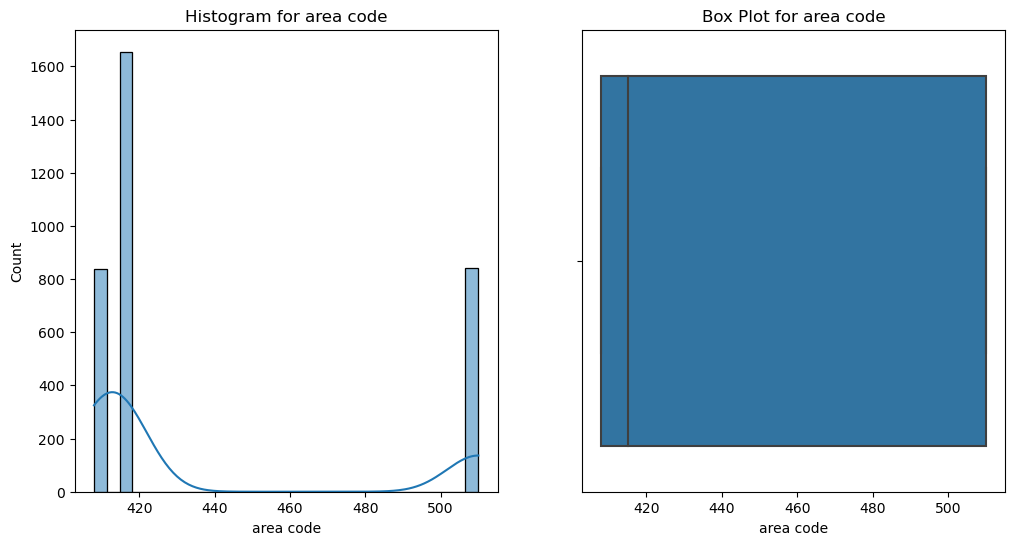

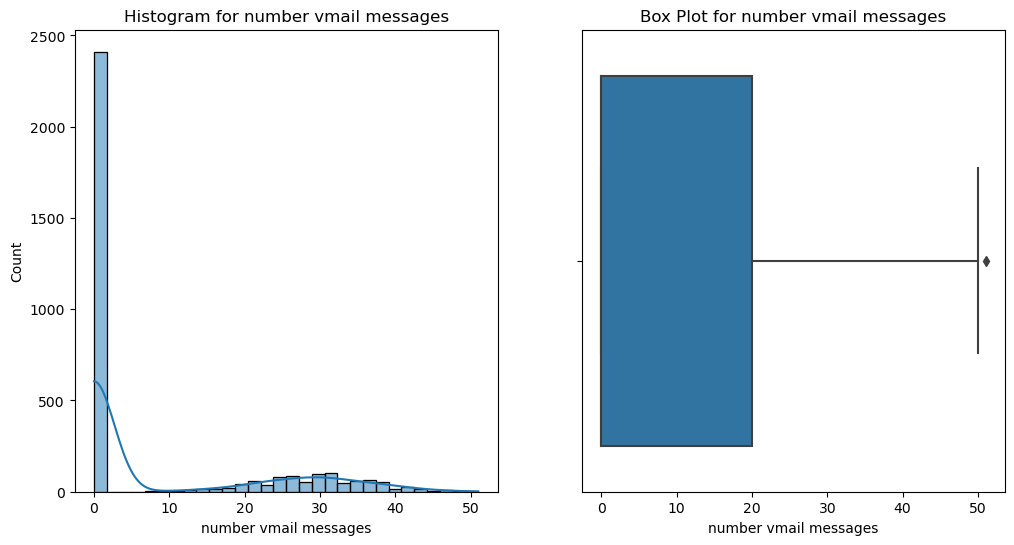

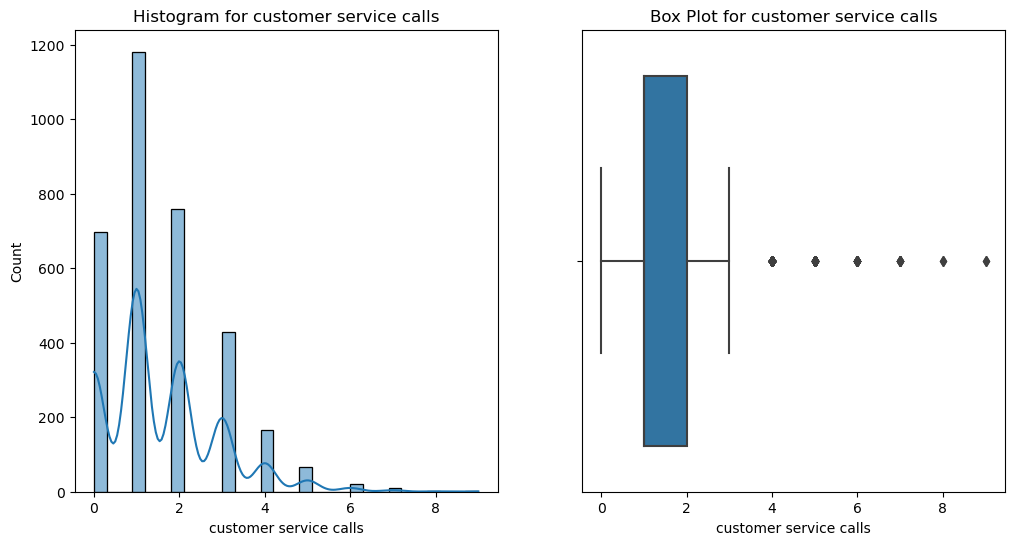

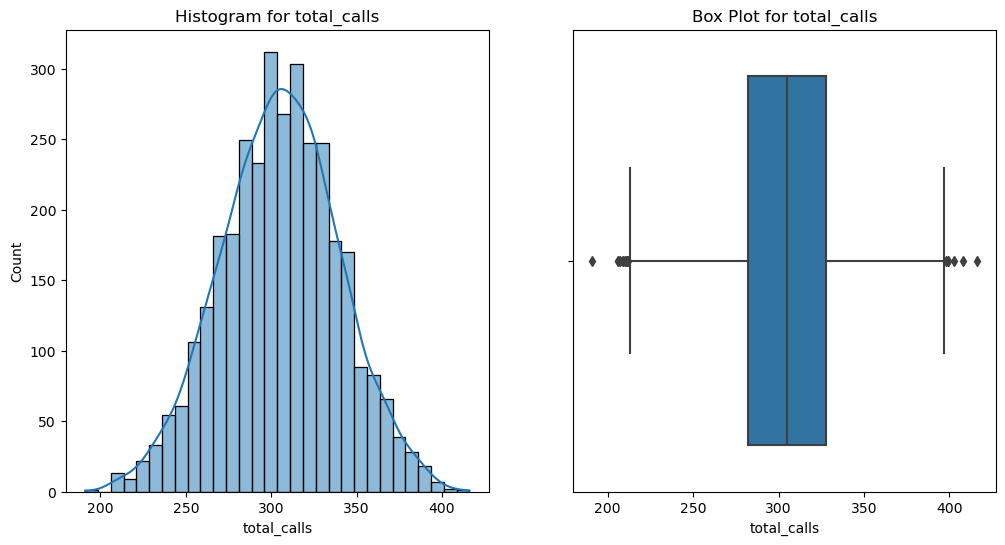

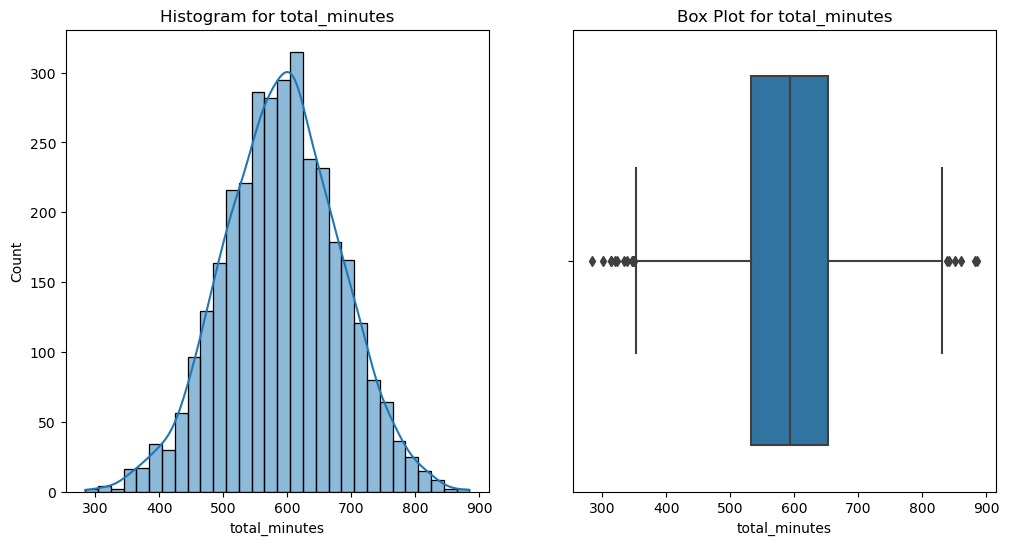

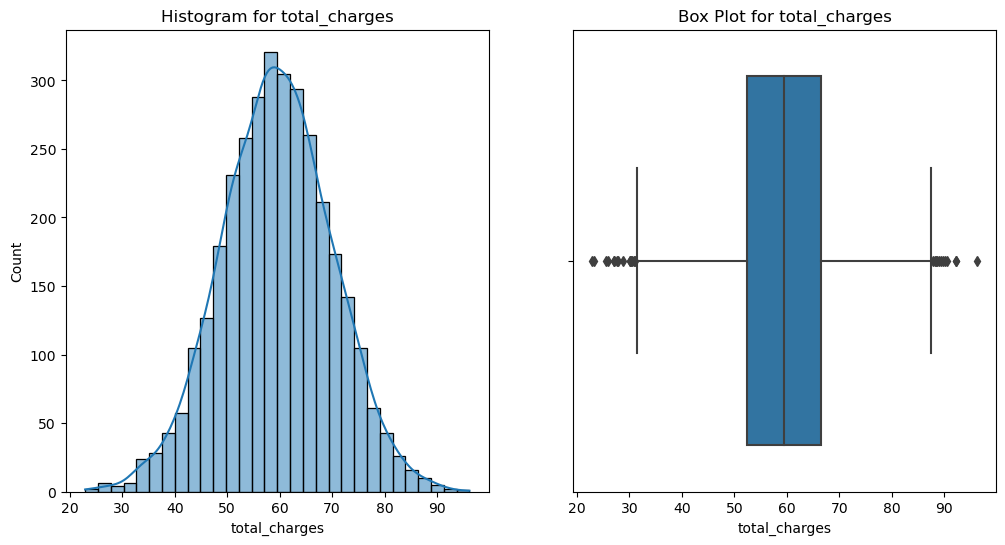

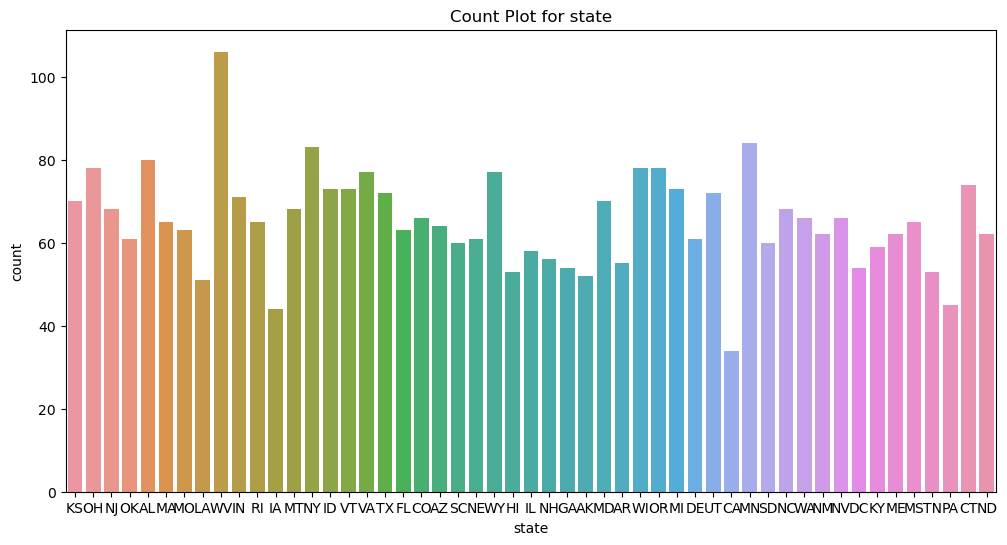

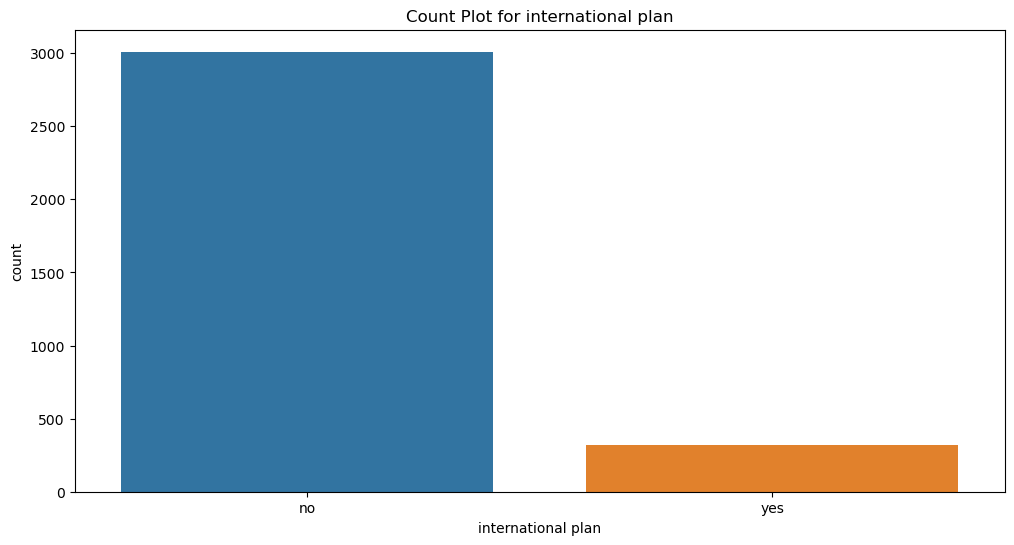

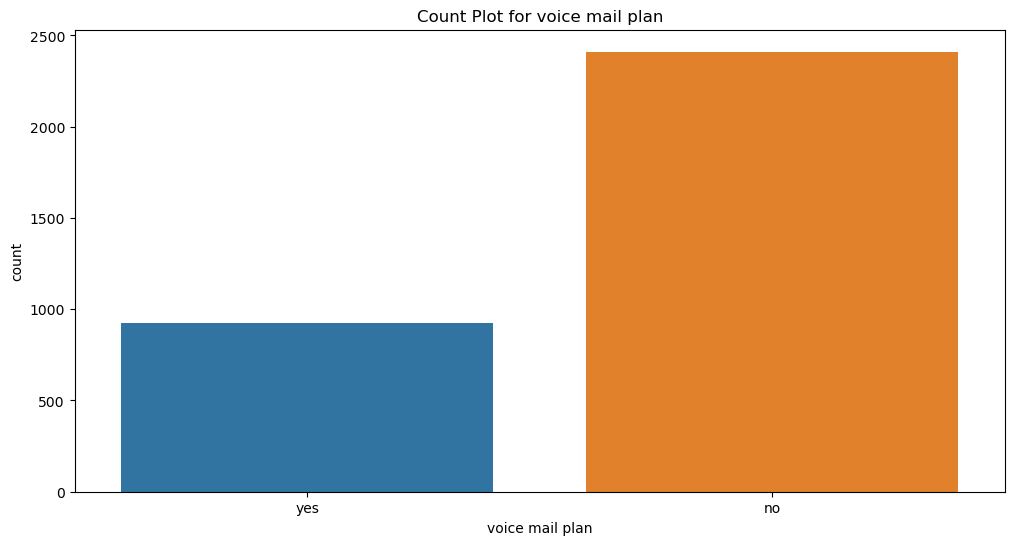

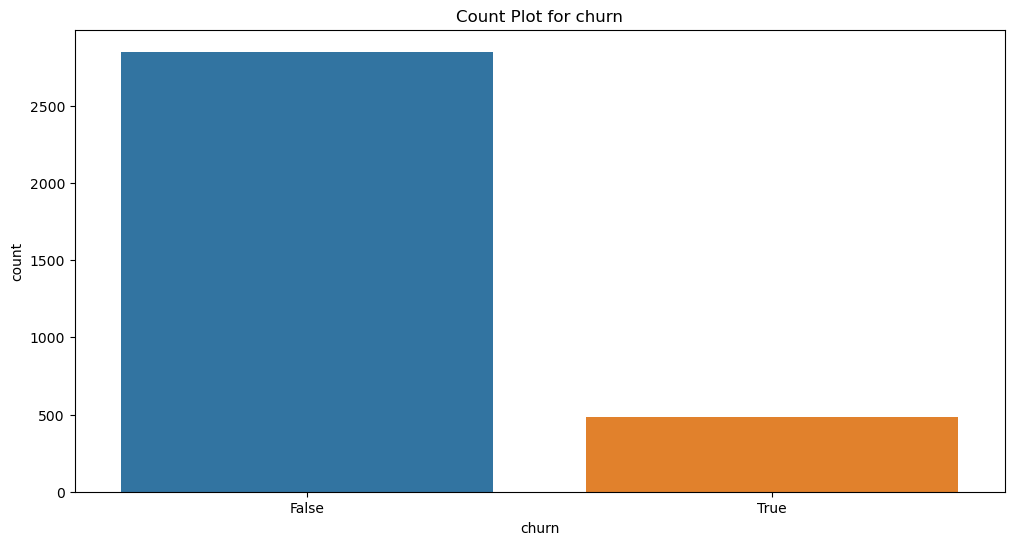

In [20]:

# data_analysis = DataAnalysis()
data_analysis.univariate_analysis(data_copy)


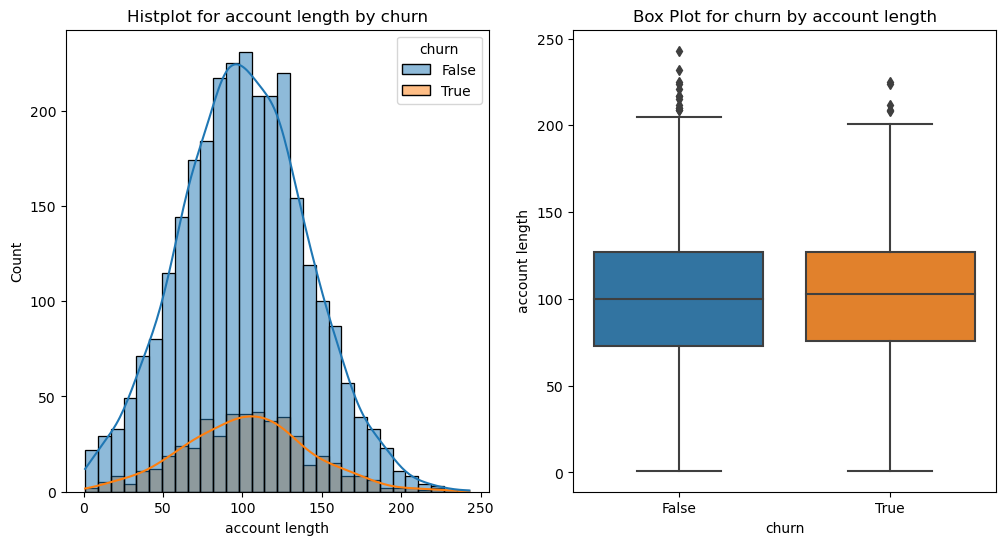

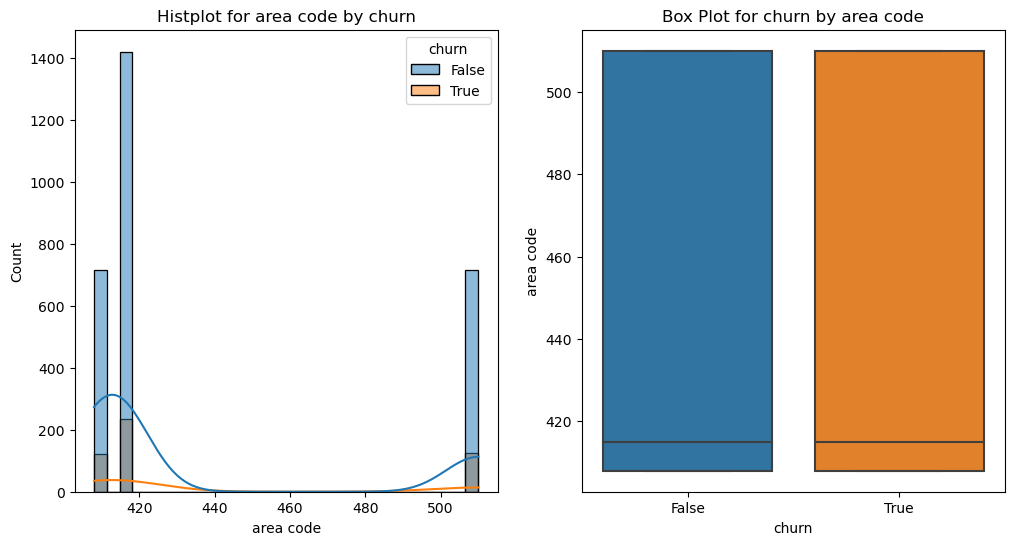

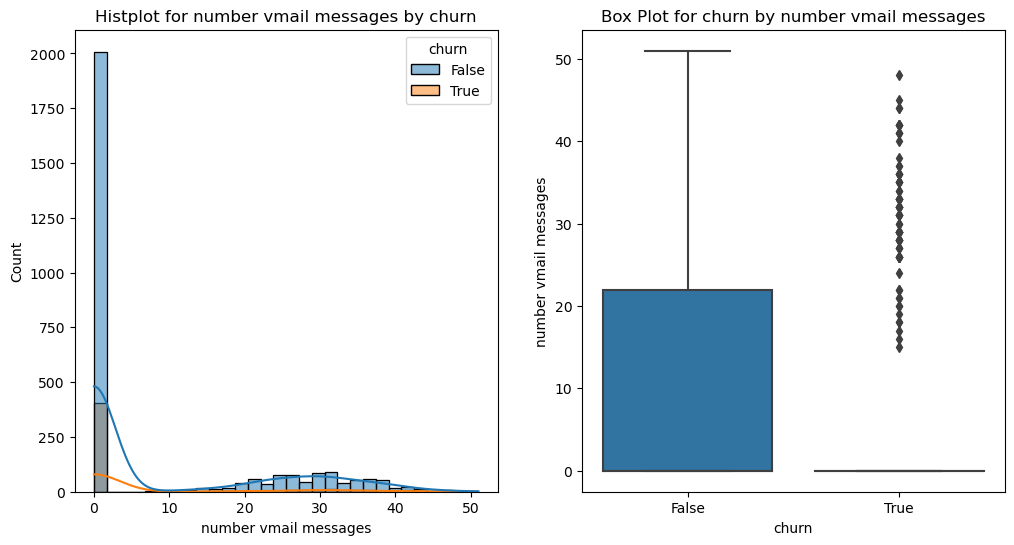

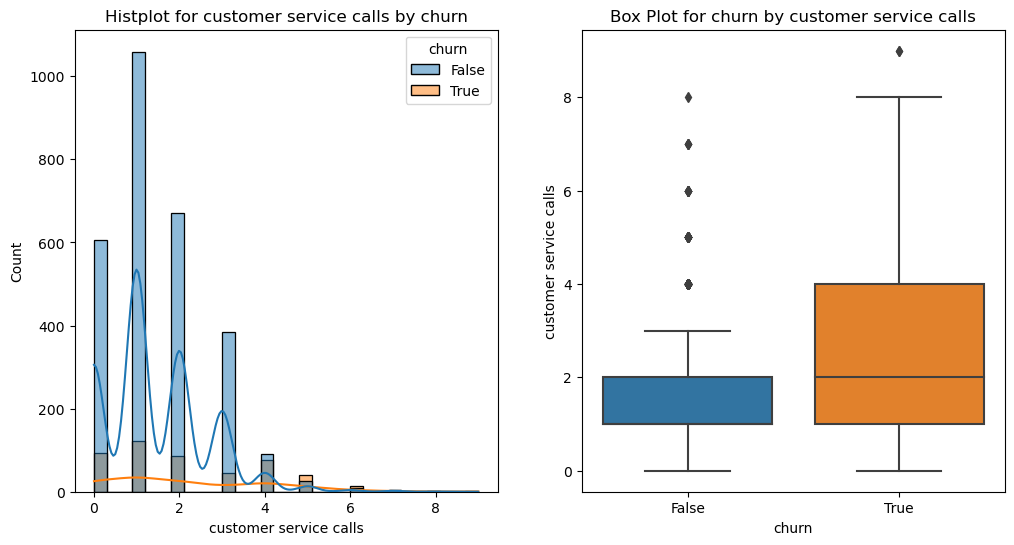

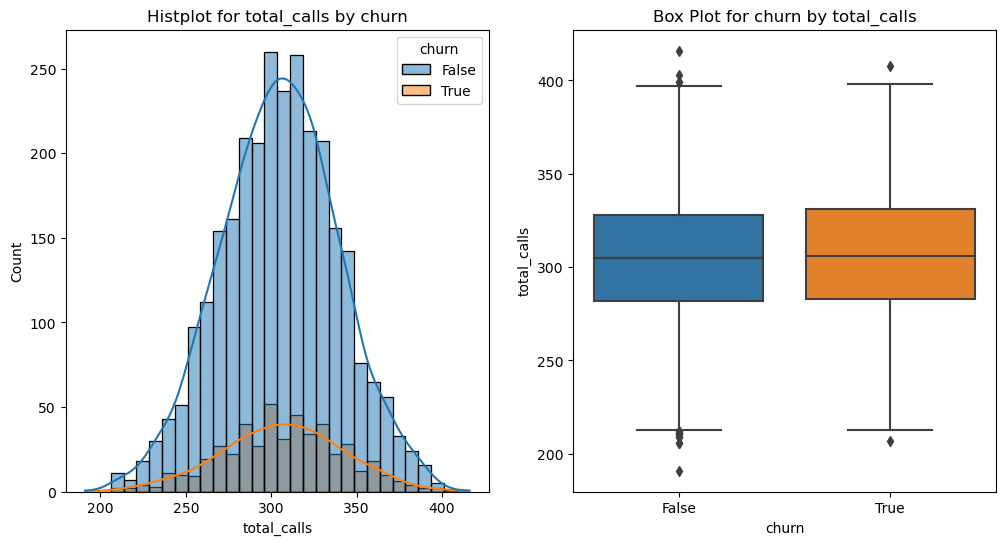

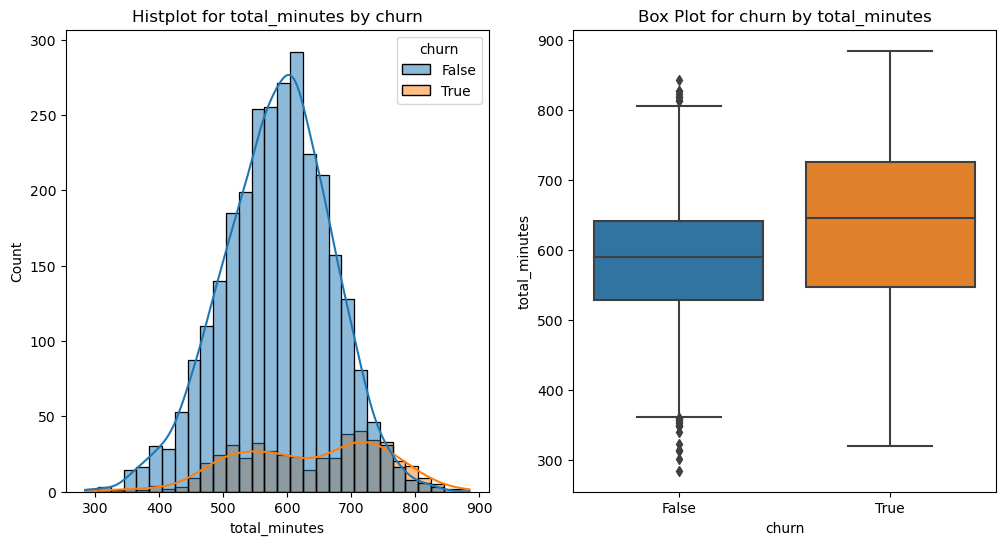

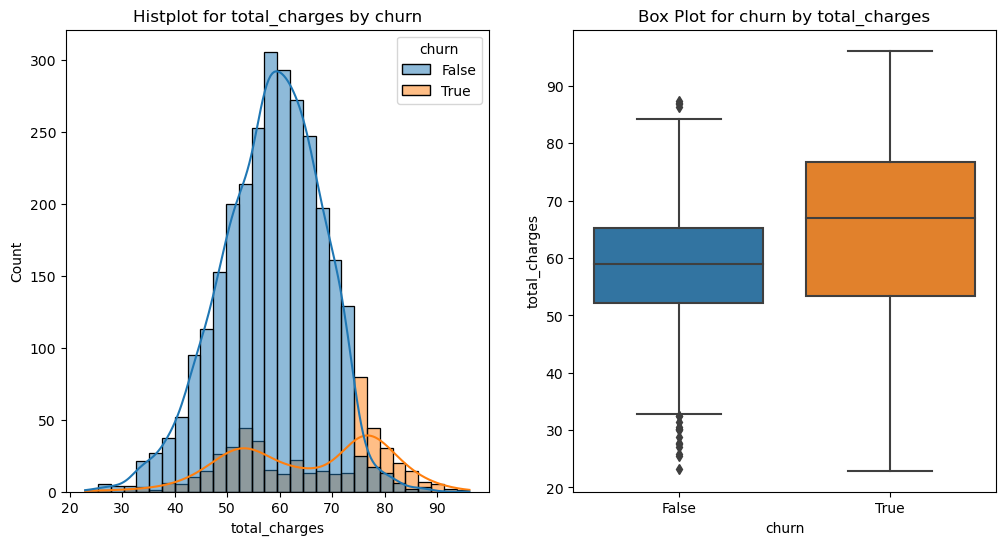

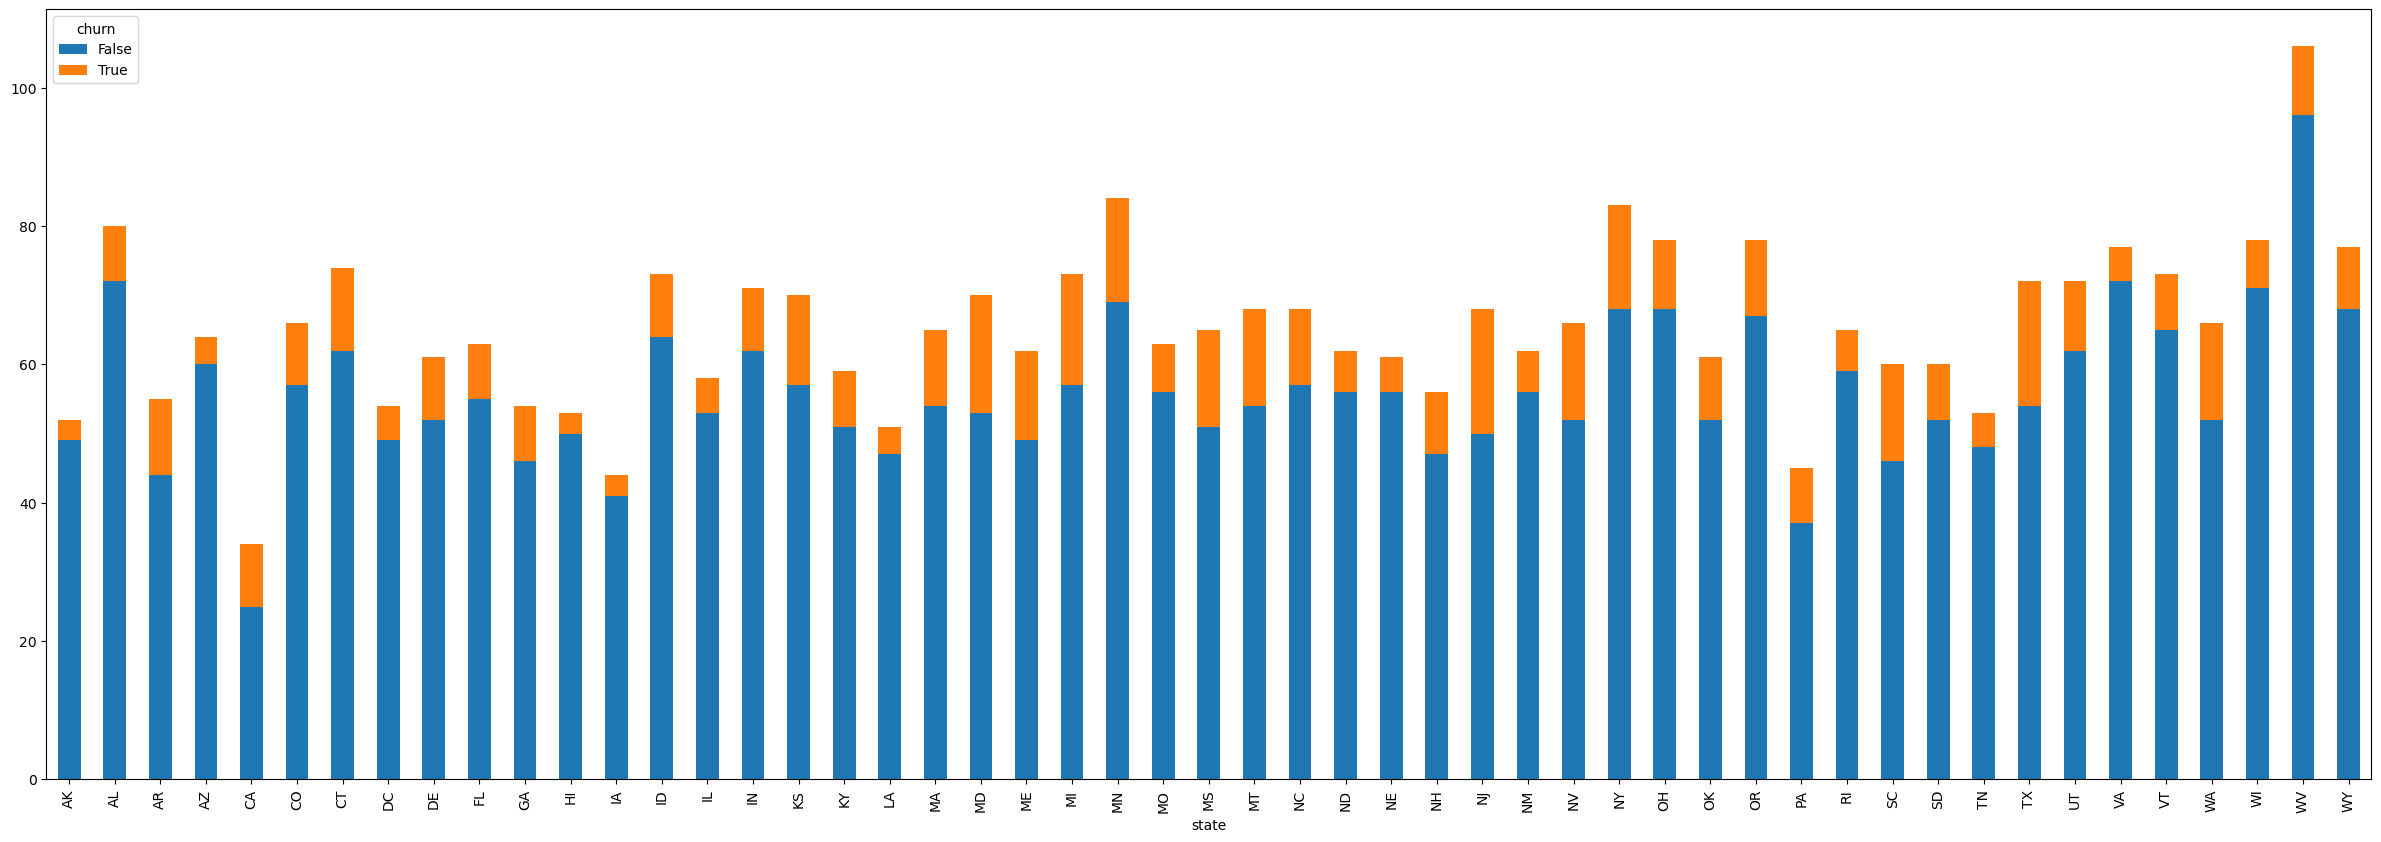

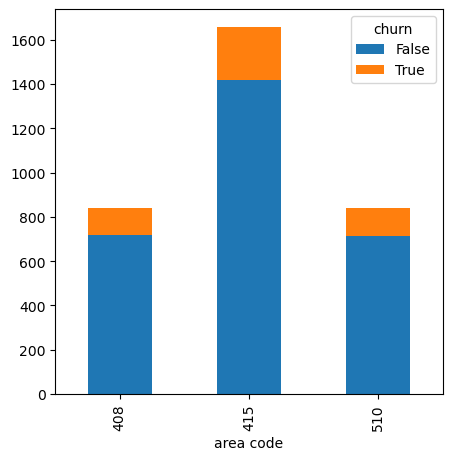

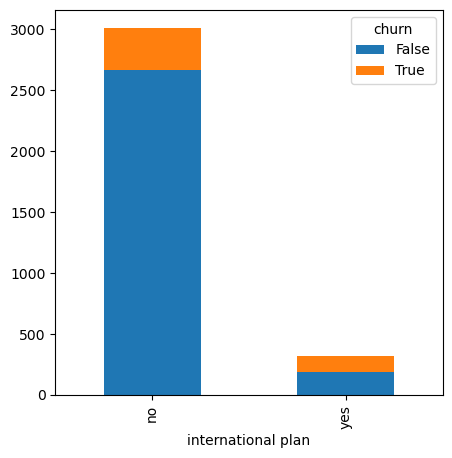

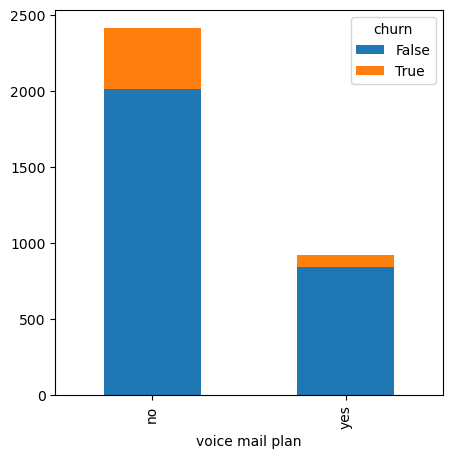

In [21]:
data_analysis_2 = DataAnalysis()
data_analysis_2.bivariate_analysis(data_copy, column_of_interest='churn')
data_analysis_2.churn_by_state(data_copy)
data_analysis_2.churn_by_area_code(data_copy)
data_analysis_2.churn_by_int_plan(data_copy)
data_analysis_2.churn_by_vm_plan(data_copy)

In [22]:
class Modeling(DataPreProcessing):
    def label_encoding(self, data_copy):
        le = LabelEncoder()
        data_copy["churn"] = le.fit_transform(data_copy["churn"])
        data_copy['state'] = le.fit_transform(data_copy['state'])
        data_copy['area code'] = le.fit_transform(data_copy['area code'])
        data_copy['international plan'] = le.fit_transform(data_copy['international plan'])
        data_copy['voice mail plan'] = le.fit_transform(data_copy['voice mail plan'])
        return data_copy
    
    def train_test_split(self, data_copy,target):
        X = data_copy.drop(columns=["churn","phone number"], axis=1)
        y = data_copy["churn"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
        return X_train, X_test, y_train, y_test
    
    def logistic_regression(self, X_train, X_test, y_train, y_test):
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = model.score(X_test, y_test)
        return score
    
    def decision_tree(self, X_train, X_test, y_train, y_test):
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score1 = model.score(X_test, y_test)
        return score1   
    
    def random_forest(self, X_train, X_test, y_train, y_test):
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score2 = model.score(X_test, y_test)
        return score2
    
    def hyperparameter_tuning(self, X_train, X_test, y_train, y_test):
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        model = RandomForestClassifier()
        grid_search = GridSearchCV(model, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        score3 = best_model.score(X_test, y_test)
        return score3



In [23]:
model_0 = Modeling()
model_0.label_encoding(data_copy)
model_0.train_test_split(data_copy, target="churn")
X_train, X_test, y_train, y_test = model_0.train_test_split(data_copy, target="churn")
print(model_0.logistic_regression(X_train, X_test, y_train, y_test))
print(model_0.decision_tree(X_train, X_test, y_train, y_test))
print(model_0.random_forest(X_train, X_test, y_train, y_test))

f:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.856071964017991
0.9115442278860569
0.9325337331334332


In [24]:
model_0.hyperparameter_tuning(X_train, X_test, y_train, y_test)

0.9415292353823088